In [39]:
import numpy as np
import matplotlib.pyplot as plt
from supervised_experiment import ActionNet, MLPNet, Encoder, ShapeDataset
from vi_lie import rodrigues
import torch
from lie_learn.groups.SO3 import change_coordinates as SO3_coordinates

In [40]:
def plot_output(images, title=""):
    fig, ax = plt.subplots(1, 10, figsize=(20, 3))
    for ax, im in zip(ax.flatten(), images):
        ax.imshow(im.detach(), 'gray')
        ax.set_axis_off()
    fig.suptitle(title)
    fig.tight_layout()
    
def rotation_interpolation():
    start = torch.rand(3)[None] * 5
    end = torch.rand(3)[None] * 5
    t = torch.linspace(0, 1, 10)[:, None]
    x = (1-t) * start + end * t
    return rodrigues(x).detach()

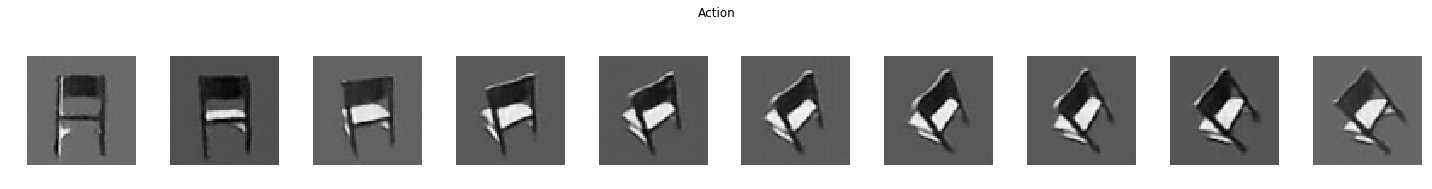

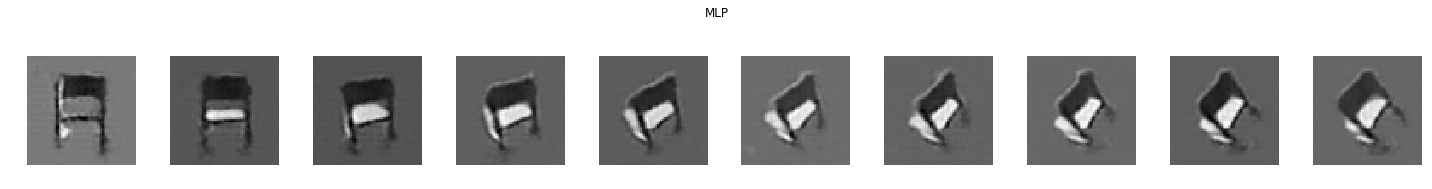

In [41]:
action_net = ActionNet(6)
action_net.load_state_dict(torch.load('supervised_outputs/action.pickle'))
mlp_net = MLPNet(6)
mlp_net.load_state_dict(torch.load('supervised_outputs/mlp.pickle'))

rot = rotation_interpolation()
action_outputs = action_net(rot)
mlp_outputs = mlp_net(rot)
    
plot_output(action_outputs, 'Action')
plot_output(mlp_outputs, 'MLP')

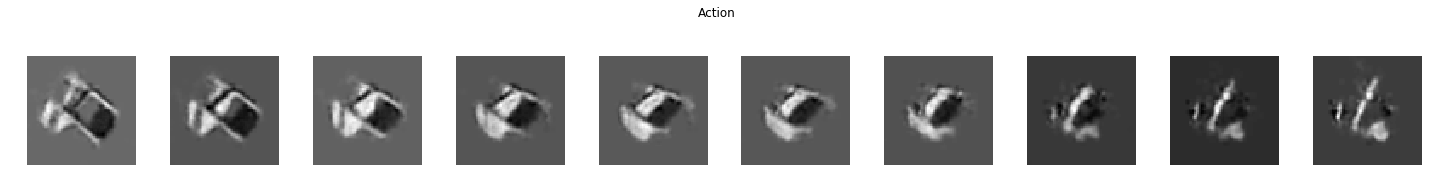

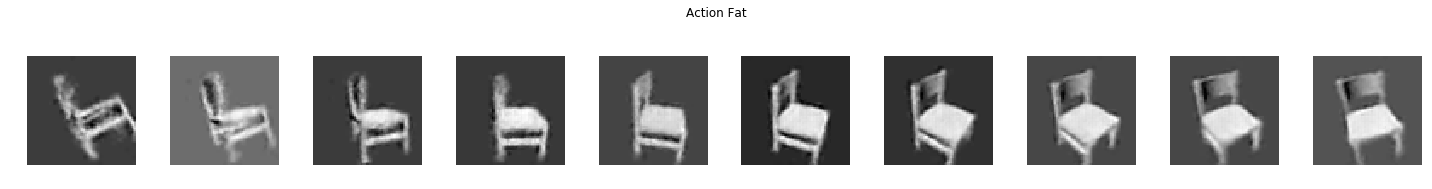

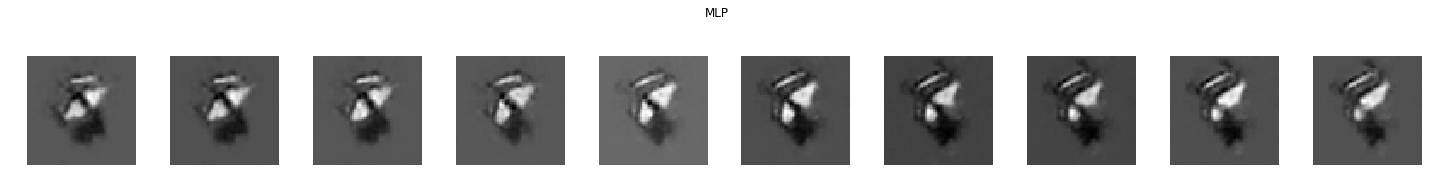

In [42]:
action_net = ActionNet(3)
action_net.load_state_dict(torch.load('ae_outputs/action_100.pickle'))
action_net_enc = Encoder()
action_net_enc.load_state_dict(torch.load('ae_outputs/action_100_enc.pickle'))

action_net_fat = ActionNet(8, deconv_hidden=200)
action_net_fat.load_state_dict(torch.load('ae_outputs/fat/action_100.pickle'))
action_net_enc_fat = Encoder()
action_net_enc_fat.load_state_dict(torch.load('ae_outputs/fat/action_100_enc.pickle'))

mlp_net = MLPNet(3)
mlp_net.load_state_dict(torch.load('ae_outputs/mlp_100.pickle'))
# mlp_net_enc = Encoder()
# mlp_net_enc.load_state_dict(torch.load('ae_outputs/mlp_100_enc.pickle'))

rot = rotation_interpolation()
action_outputs = action_net(rot)
action_fat_outputs = action_net_fat(rot)
mlp_outputs = mlp_net(rot)
    
plot_output(action_outputs, 'Action')
plot_output(action_fat_outputs, 'Action Fat')
plot_output(mlp_outputs, 'MLP')

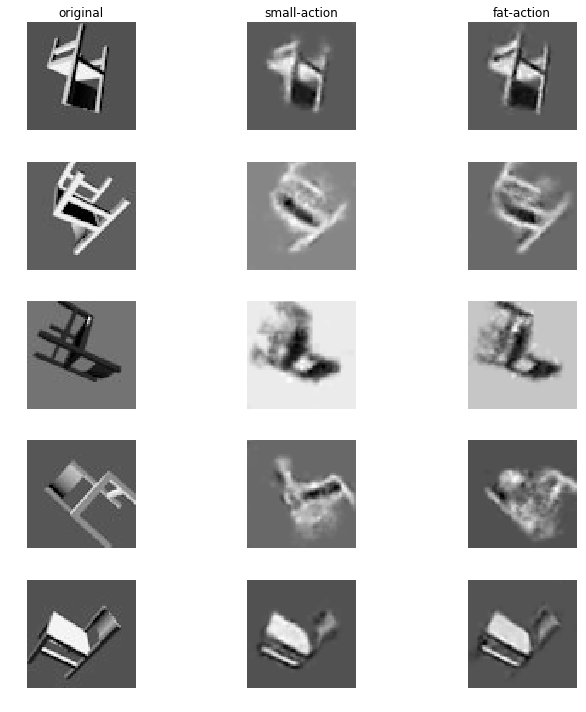

In [48]:
dataset = ShapeDataset('./shapes')
idxs = np.random.choice(len(dataset), size=5, replace=False)
images = torch.stack([dataset[i][1] for i in idxs], 0)
reconstructions = action_net(action_net_enc(images))
reconstructions_fat = action_net_fat(action_net_enc_fat(images))

def plot_reconstructions(versions, titles):
    n_versions = len(versions)
    n_images = len(versions[0])
    
    fig, ax = plt.subplots(n_images, n_versions, figsize=(10, 10))
    for i in range(n_images):
        for j in range(n_versions):
            ax[i, j].imshow(versions[j][i].detach(), 'gray')
            ax[i, j].set_axis_off()
            if i == 0:
                ax[i, j].set_title(titles[j])
#     fig.suptitle(title)
    fig.tight_layout()
    
plot_reconstructions([images, reconstructions, reconstructions_fat],
                     ['original', 'small-action', 'fat-action'])